- 모든 알고리즘이 분류와 회귀를 가지고 있다.
- 그 중 분류는 tree, 회귀는 선형 알고리즘에 대해 알아볼 예정.
- 분류(Classification)는 학습 데이터로 주어진 데이터의 feature, label 값을 머신러닝 알고리즘으로 학습하여 모델을 생성한다. 해당 모델에 test(새로운 데이터) 값을 입력한 후 label 값을 예측하게 한다.
- 대표적인 분류 알고리즘
  - 결정 트리 (Decision Tree)
  - 앙상블 (Ensemble)

# 5. 트리 모델
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내는 트리 기반의 비선형 알고리즘 분류 규칙.
- 데이터의 분할 기준 규칙이 알고리즘 성능에 크게 작용한다.
- 이진트리 (binary tree) 라고도 한다.
- `Root Node` == 시작 규칙 노드
- `Rule Node` == 분류를 위해 규칙을 만들어 주는 노드
- `Leaf Node (Pure Node)` == 더 이상 분류를 위한 규칙을 마련할 수 없는 결정된 분류값이 들어있는 가장 마지막 노드 (분류 100% 완료 상태)
- `Branch (Sub Tree)` == 생성된 룰 노드에 의해 하위 트리가 만들어진 형태
- `Depth` == 서브 트리가 생성될수록 깊이가 증가하고, 질문의 깊이가 깊어질수록 질문이 많고 복잡해진다.

In [ ]:
# 불필요한 경고 메시지 삭제

import warnings
warnings.filterwarnings('ignore')

## 데이터 불러오기

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
  iris_data.data,
  iris_data.target,
  test_size=0.2,
  random_state=11
)

## 결정트리 모델 생성
- 트리는 균일함을 찾기 위한 과정을 학습한다.
- 정보 균일도 측정 방법
  - 정보 이득 (Information Gain)
  - 지니 계수
    - 0일수록 평등, 1일수록 불평등하다.
    - 지니 계수가 낮을수록 데이터 균일도가 높다. (엔트로피가 낮다.)
- 쉽고 직관적이라 선형 모델보다 훨씬 쉬운 게 트리 모델이다.
- 너무 세세하게 분류하려 하기 때문에 과대적합(Overfitting)으로 인해 알고리즘 성능이 떨어질 수 있기 때문에 모델 복잡도를 조절할 수 있도록 트리의 크기를 사전에 제한하는 튜닝이 필요하다. (하이퍼 파라미터 튜닝)
  - 너무 높거나 낮지 않은, 가장 일반적인 성능을 갖는 **일반화 지점** 을 찾아야한다.
- 결정 트리 주요 하이퍼 파라미터
  - `max_depth`
  - `max_features`⭐
  - `min_samples_split`⭐: 설정값보다 작으면 노드가 분할되지 않고 leaf node로 남게된다.
  - `min_samples_leaf`
  - `max_leaf`

In [ ]:
# 하이퍼 파라미터를 지정하지 않으면 기본적으로 트리 모델은 과대적합 상태.
#   X_train에 들어있는 데이터를 학습한다.

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

## Graphviz 시각화
- 트리 모델이 어떻게 훈련했는지 시각화한다.

In [ ]:
# tree 모듈의 export_graphviz 함수를 이용해 tree를 시각화 할 수 있다.
#   좌측 directory에서 tree.dot 파일이 마운트되어 있는 것 확인 가능.

from sklearn.tree import export_graphviz

export_graphviz(
    # 시각화할 모델
    dt_clf,
    # 시각화 결과물을 저장할 파일의 경로
    out_file='tree.dot',
    # 문자열로 된 각 클래스들의 이름을 가진 리스트
    class_names=iris_data.target_names,
    # 문자열로 된 각 특성들의 이름을 가진 리스트
    feature_names = iris_data.feature_names,
    impurity=True,
    filled=True
)

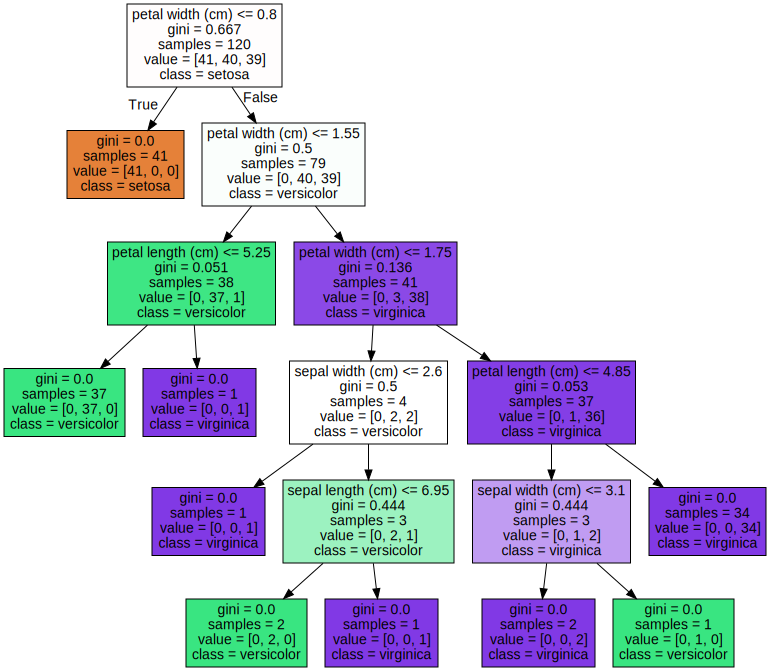

In [ ]:
# export_graphviz를 이용해 만든 시각화 파일 불러오기
#   리스트의 인덱스 == 클래스의 번호 (ex. 0번 클래스 꽃 = setosa)
#   gini => 지니계수, 0에 가까울수록 균일하다.
#   samples => 데이터의 개수
#   values => 클래스 값이 1개만 남게 되면 leaf node. 2개 이상이라면 더 높은 값의 클래스로 분류된다.

import graphviz

with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

## 정확도 확인

In [ ]:
# 미리 학습한 데이터 & 학습하지 않은 새로운 데이터 각각에 대한 예측
#   accuracy_score => 실제 레이블(y) 값, 예측값(pred)
#   decision tree는 모든 클래스를 완벽하게 분류하려고 하기 때문에 기본적으로 과대적합 상태로, 전체적인 데이터 추세를 보지 못한다는 단
#   하기 훈련 세트 정확도 결과: 1.000 == 일반적이지 않은 상황까지 모두 해결하려고 하는 과대적합 상황.
from sklearn.metrics import accuracy_score

train_pred = dt_clf.predict(X_train)
test_pred = dt_clf.predict(X_test)

print("훈련 세트에 대한 점수 : {:.3f}".format(accuracy_score(y_train, train_pred)))
print("테스트 세트에 대한 점수 : {:.3f}".format(accuracy_score(y_test, test_pred)))

훈련 세트에 대한 점수 : 1.000
테스트 세트에 대한 점수 : 0.933


## max_depth를 이용한 질문의 깊이 제어

In [ ]:
# 결정트리 추가 생성 => 최대 깊이 설정 => 훈련 실시

dt_clf_depth_2 = DecisionTreeClassifier(max_depth=2)
dt_clf_depth_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

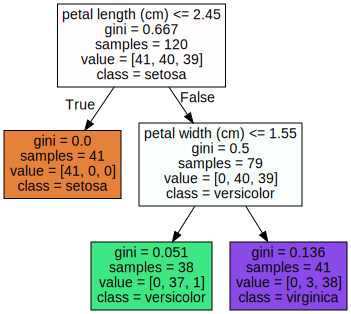

In [ ]:
export_graphviz(
    dt_clf_depth_2,
    out_file="tree.dot",
    class_names=iris_data.target_names,
    feature_names=iris_data.feature_names,
    impurity=True,
    filled=True
)

with open("tree.dot") as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

In [ ]:
# max_depth 추가 설정 외에는 바로 위의 결정트리 모델과 코드 동일

train_pred = dt_clf_depth_2.predict(X_train)
test_pred = dt_clf_depth_2.predict(X_test)

print("훈련 세트에 대한 점수 : {:.3f}".format(accuracy_score(y_train, train_pred)))
print("테스트 세트에 대한 점수 : {:.3f}".format(accuracy_score(y_test, test_pred)))

훈련 세트에 대한 점수 : 0.967
테스트 세트에 대한 점수 : 0.867


## 샘플 데이터로 훈련 상황 확인

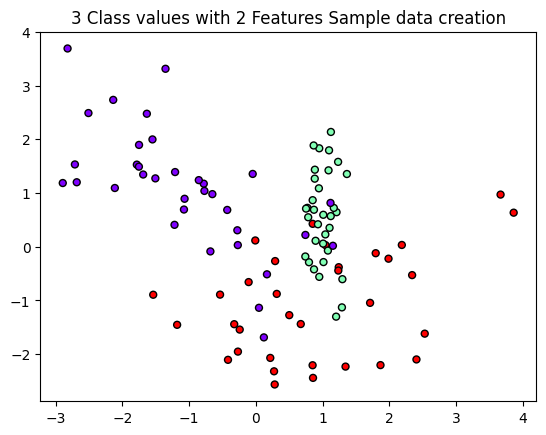

In [ ]:
# make_classification => 2차원 시각화를 위해 feature은 2개, 결정값 클래스는 3개의 classification 샘플 데이터 생성
#   plot 형태로 2차원 좌표 시각화 (2개 feature, 3개 class) => 클래스별 영역 구분 가능
#   다만 각 데이터의 오류 데이터 값은 정확하게 분류할 필요 없다 (일반화)
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title('3 Class values with 2 Features Sample data creation')

X_features, y_labels = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_classes=3,
    n_clusters_per_class=1,
    random_state=0
)

plt.scatter(
    X_features[:, 0],
    X_features[:, 1],
    marker='o',
    c=y_labels,
    s=25,
    cmap='rainbow',
    edgecolor='k'
)
plt.show()

In [ ]:
# Classifier의 Decision Boundary를 시각화 하는 함수 정의

import numpy as np

def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)


## 기본 결정 트리 확인

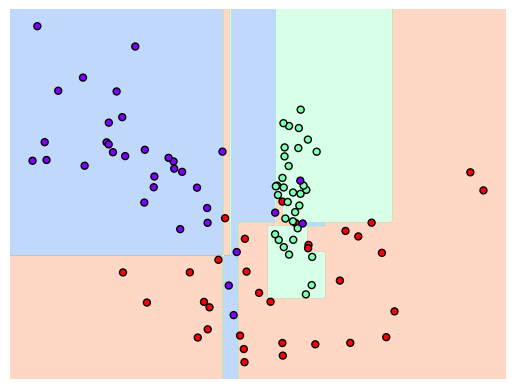

In [ ]:
# 하이퍼 파라미터를 조절하지 않은 결정트리 모델은 항상 과대적합 상태 (그래프 정중앙의 혼잡한 영역 참고)

from  sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)

visualize_boundary(dt_clf, X_features, y_labels)

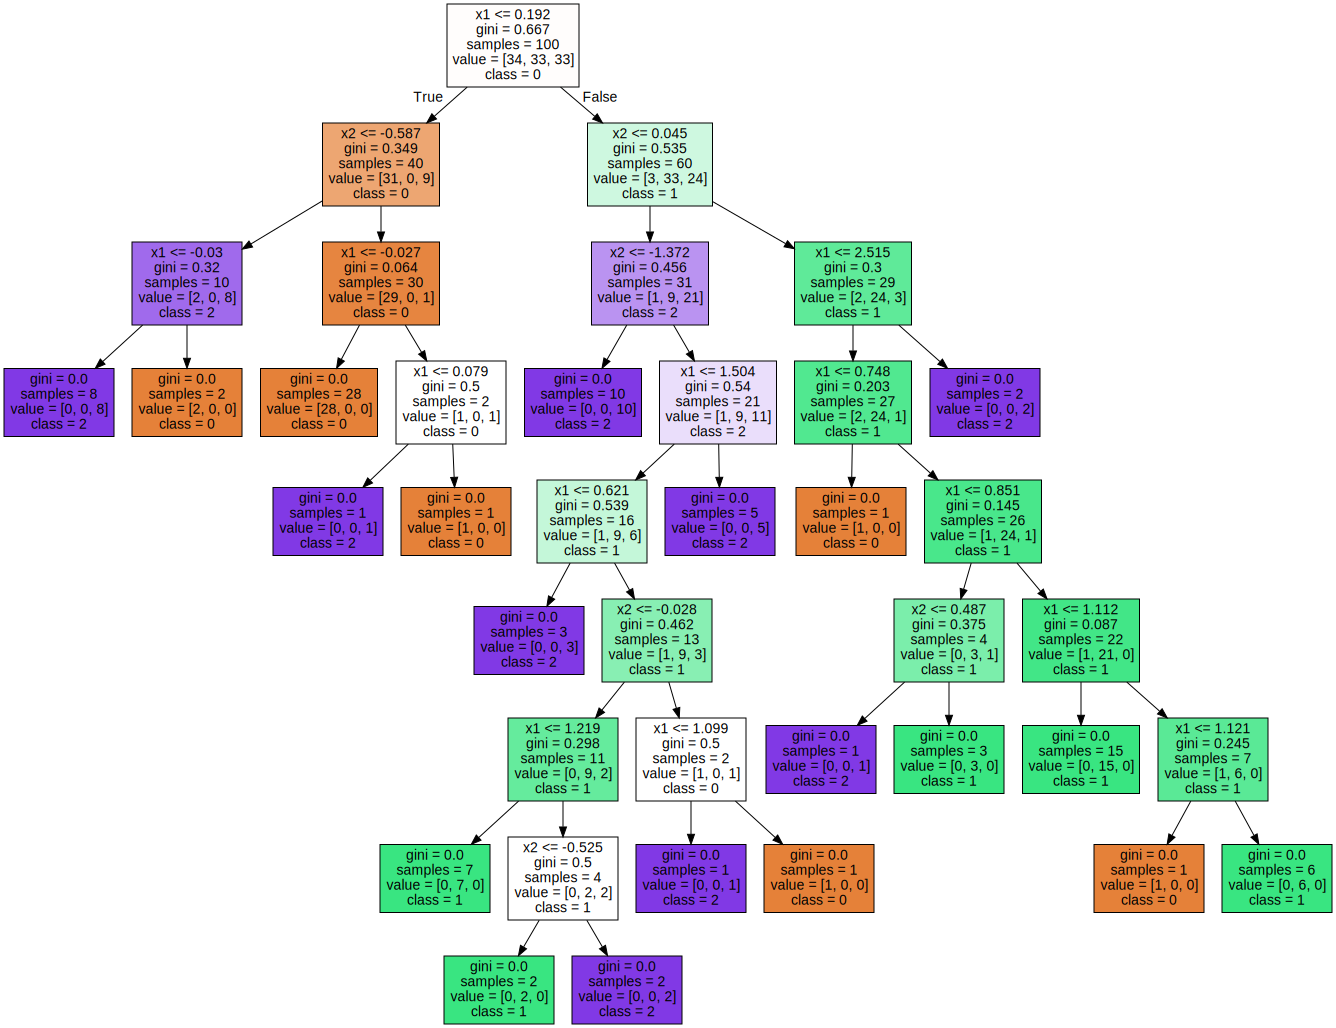

In [ ]:
# sklearn.tree 모듈의 export_graphviz 함수를 이용해 tree 시각화
#   export_graphviz 함수로 생성한 tree.dot 파일 => Graphviz => 시각화

export_graphviz(
    dt_clf,
    out_file='tree.dot',
    class_names=['0', '1', '2'],
    feature_names=['x1', 'x2'],
    impurity=True,
    filled=True
)

with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

## max_depth 조절
- 기본결정트리의 최대 깊이 조절

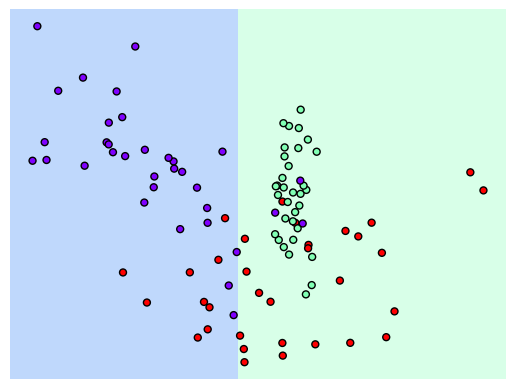

In [ ]:
# 최대 깊이 = 1
#   질문을 한번밖에 못하는 상황이 되므로, 좌우 각 단일 색상으로 단순하게 판단한다.
#   빨간색 클래스는 아예 캐치하지 못한 과소적합 상태

dt_clf = DecisionTreeClassifier(max_depth=1).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

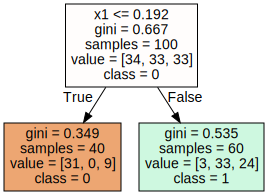

In [ ]:
# 상기 동일한 방법으로 시각화

export_graphviz(
    dt_clf,
    out_file='tree.dot',
    class_names=['0', '1', '2'],
    feature_names=['x1', 'x2'],
    impurity=True,
    filled=True
)

with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

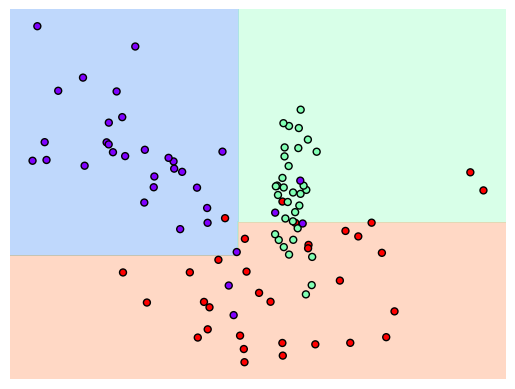

In [ ]:
# 최대 깊이 = 2
#   적절한 수준으로 분리된 일반화 지점
#   하이퍼 파라미터 조정으로 모델의 성능이 달라지는 것을 확인할 수 있다

dt_clf = DecisionTreeClassifier(max_depth=2).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

## min_samples_split
- 노드를 분할하기 위해, 가지고 있어야 하는 최소한의 샘플 개수
- 설정값이 적을수록 분할 노드가 많아져서 과대적합 가능성 증가
- 설정값보다 작으면 분할되지 않고 leaf node로 남게 된다.
- 설정값보다 크더라도 지니계수가 0이라면 leaf node로 남게 된다.

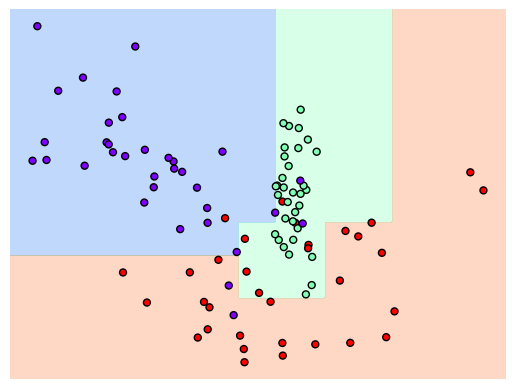

In [ ]:
dt_clf = DecisionTreeClassifier(min_samples_split=20).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

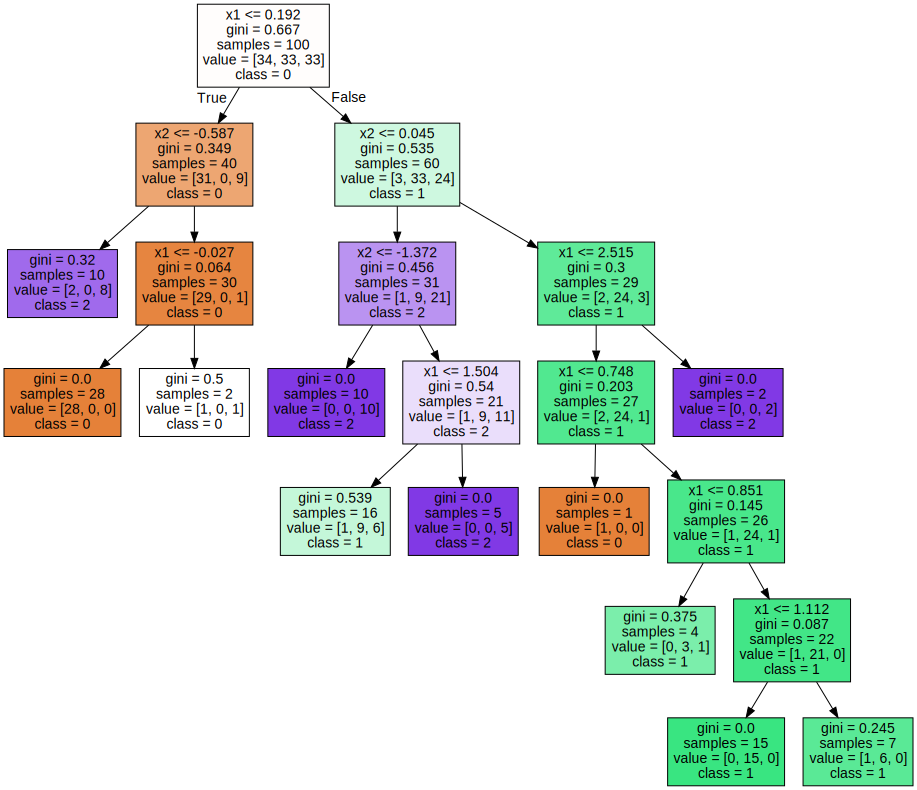

In [ ]:
# 상기 동일한 방법으로 시각화

export_graphviz(
    dt_clf,
    out_file='tree.dot',
    class_names=['0', '1', '2'],
    feature_names=['x1', 'x2'],
    impurity=True,
    filled=True
)

with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

## min_samples_leaf
- 규칙 노드에서 분할된 왼쪽/오른쪽 노드를 만들기 위해, 가지고 있어야 할 최소한의 샘플 데이터 개수
- 분할되기 위해서는 (좌우로 할당되기 위해) 2개 이상의 value 클래스 값이 min_saples_leaf 설정값보다 크거나 같아야 한다.

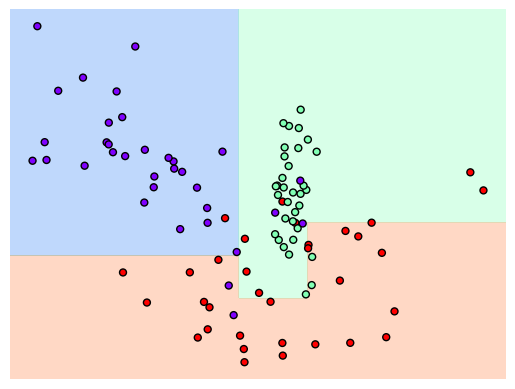

In [ ]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

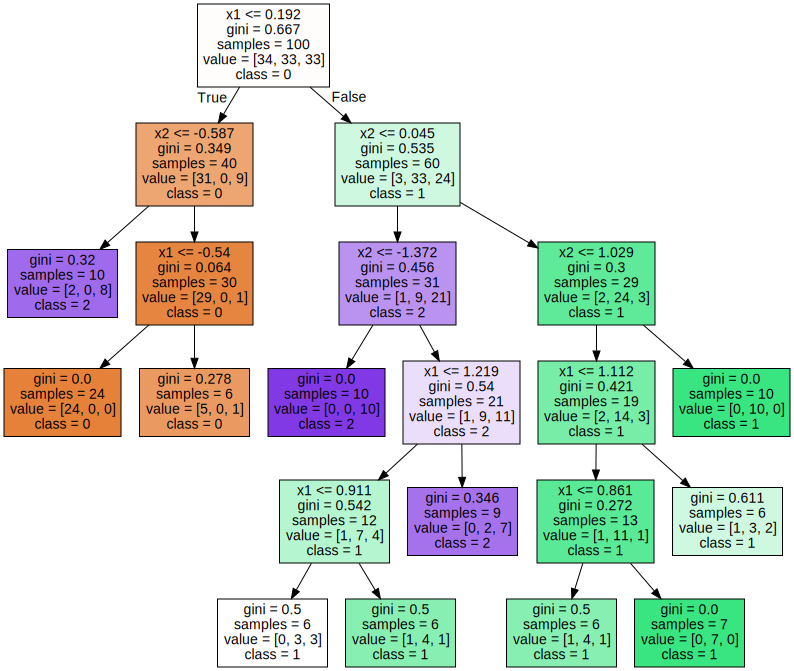

In [ ]:
# 상기 동일한 방법으로 시각화

export_graphviz(
    dt_clf,
    out_file='tree.dot',
    class_names=['0', '1', '2'],
    feature_names=['x1', 'x2'],
    impurity=True,
    filled=True
)

with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

- `min_samples_split`와 `min_samples_leaf`를 조합하여 사용하기도 한다.
- `min_samples_split`는 분할 할 수 있는 샘플수를 지정하는 것
  - samples >= 설정값
- `min_samples_leaf`를 분할해서 leaf가 될 수 있는 샘플수를 지정하는 것
  - value의 각 클래스별 값 >= 설정값

## 특성 중요도
- 균일한 샘플이 들어있는 노드를 만들기 위해 어떤 특성이 주요하게 사용되는지 알 수 있다.
- 비즈니스보다는 머신러닝 알고리즘 관점에서 중요한 개념이다.

In [ ]:
dt_clf_iris = DecisionTreeClassifier().fit(X_train, y_train)
dt_clf_iris.feature_importances_

array([0.01667014, 0.        , 0.05701164, 0.92631822])

In [ ]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

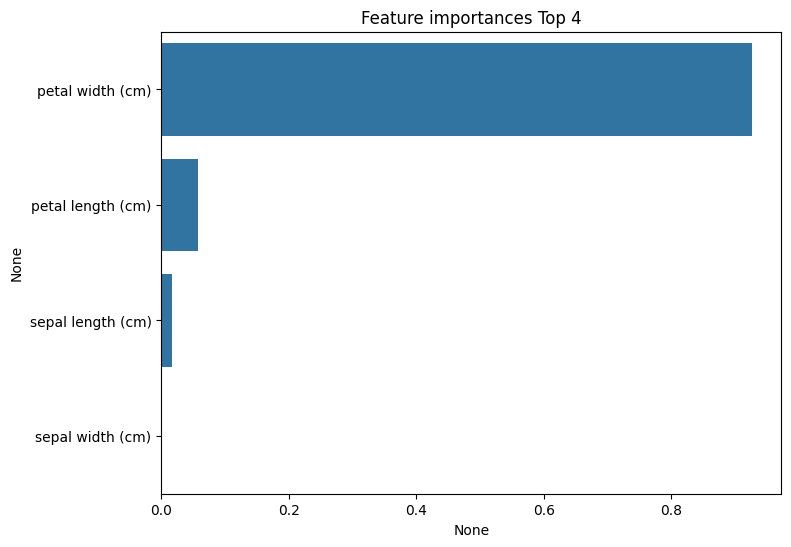

In [ ]:
#   seaborn 적용 => Top 중요도로 정렬을 쉽게 하고, seaborn 막대그래프로 쉽게 표현하기 위해 Series 변환
#   ftr_top => 중요도 순으로 series 정렬
#   petal width로만 분류했을 때 가장 균일도가 높음을 알 수 있다.

import pandas as pd
def plot_feature_importance(model, columns, limit=None):
  import seaborn as sns

  ftr_importances_values = model.feature_importances_
  ftr_importances = pd.Series(ftr_importances_values, index=columns  )
  ftr_top = ftr_importances.sort_values(ascending=False)[:limit]
  plt.figure(figsize=(8,6))
  plt.title(f'Feature importances Top {len(columns) if limit == None else limit}')
  sns.barplot(x=ftr_top , y = ftr_top.index)
  plt.show()

plot_feature_importance(dt_clf_iris, iris_data.feature_names)

In [ ]:
import seaborn as sns

iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


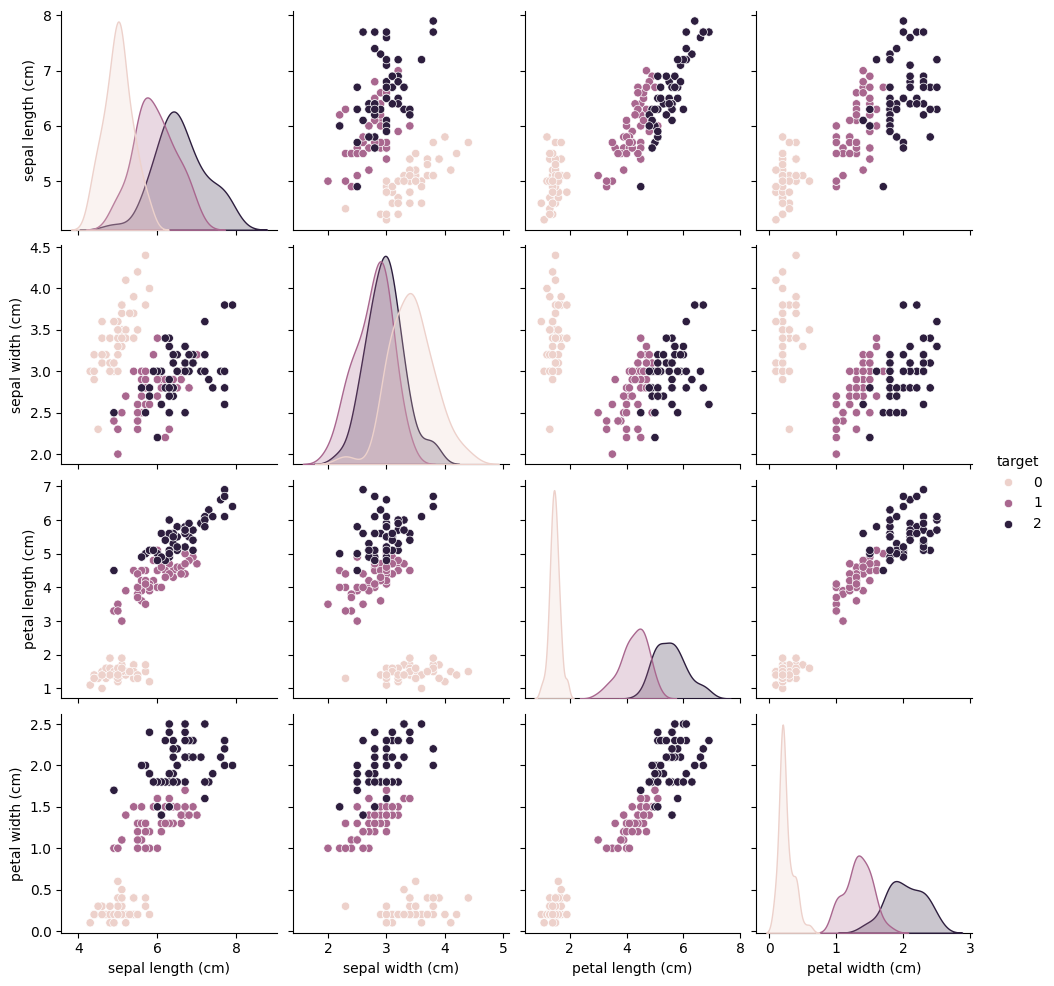

In [ ]:
sns.pairplot(
    iris_df,
    hue='target',
    height=2.5
)

# 6. 앙상블
- 여러개의 모델을 이용하여 하나의 결과를 도출 (decisiontree보다 훨씬 많이 사용)
- 랜덤 포레스트 및 많은 부스팅 알고리즘들이 모두 결정트리 알고리즘 기반 적용
  - 결정트리의 단점인 과대적합 보완, 장점인 직관적인 분류 기준 강화
- 여러 개의 분류기(classifier)를 생성하고 그 예측을 결합함으로서 보다 신뢰성이 높은 최종 예측 도출하는 기법
- 유형:
  - 보팅(voting)
  - 배깅(bagging):
    - 랜덤 포레스트 알고리즘
  - 부스팅(boosting):
    - 에이다 부스팅
    - 그라디언트 부스팅
    - XGBoost
    - LightGBM


## 보팅(voting)과 배깅(bagging)
- 보팅과 배깅은 여러개의 분류기가 투표를 통해 최종 예측 결과를 결정한다.
- 보팅보다 배깅을 많이 사용한다.
- voting: 서로 다른 알고리즘을 가진 분류기 결합
- bagging: 같은 알고리즘을 가진 분류기를 결합하나, 각각 일부의 데이터셋을 가져가서 서로 다른 샘플링 수행, 보팅까지 수행

### 보팅
- hard voting: 여러 classifier 간 다수결로 최종 class 결정
- soft voting: 여러 classifier의 class 확률 평균값으로 최종 class 결정 (일반적으로 사용되는 방법)

### 배깅
- bootstrap sampling
- 기존 학습 데이터셋으로부터 랜덤하게 복원추출(중복허용)하여 같은 크기의 데이터셋 여러개를 만든다.

## RandomForest
- 대표적인 배깅 방식
- 하나의 알고리즘(결정트리)으로 각자의 데이터를 샘플링하여 개별적으로 학습을 수행한 후, 소프트 보팅을 통해 최종 class를 예측 결정한다.

In [2]:
# sklearn.datasets => 사이킷런에 내장되어 예제로 제공하는 데이터 세트
#   noise => 출력 즉, 종속 변수에 더해지는 정규 분포의 표준 편차
#   stratify => 원본 데이터의 비율과 동일하게 테스트 세트를 생성하기 위해 지정하는 데이터 기준

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [4]:
# n_estimators => 숲을 구성할 나무의 개수, 즉 결정트리의 개수 (default=100)
#   test_size => 별도 지정하지 않으면 기본값 0.25가 자동으로 설정된다.

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=5, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [6]:
# classifier의 decision boundary를 시각화하는 함수 visualize_boundary 정의

import numpy as np

def visualize_boundary(model, X, y, ax):

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)

    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

<ipython-input-6-f80bc4088322>:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
<ipython-input-6-f80bc4088322>:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
<ipython-input-6-f80bc4088322>:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
<ipython-input-6-f80bc4088322>:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
<ipython-input-6-f80bc4088322>:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
<ipython-input-6-f80bc4088322>:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


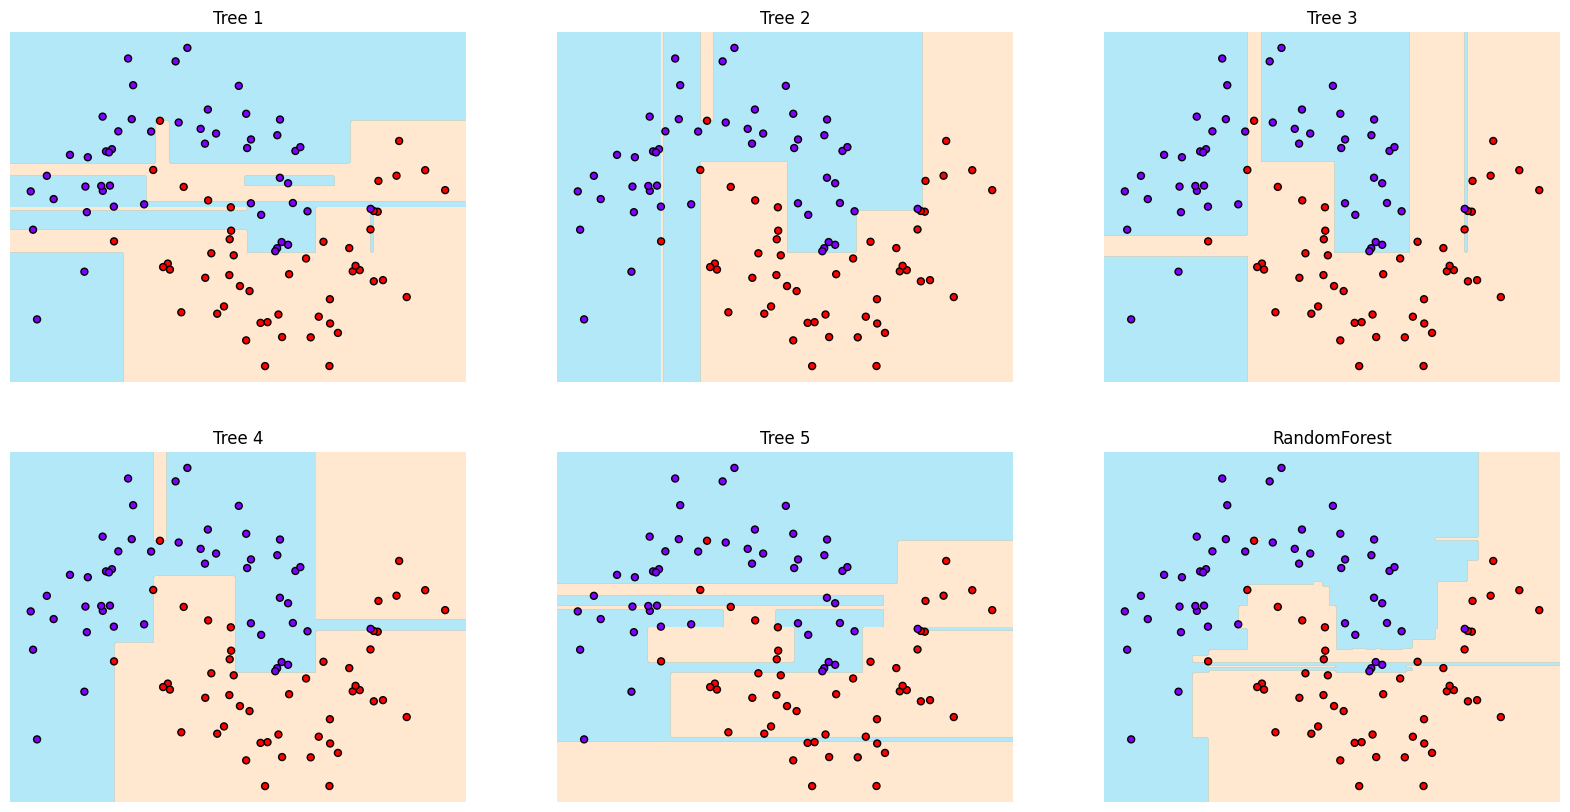

In [7]:
# 랜덤 포레스트의 결정 영역 시각화 ~ 어떤 방식으로 학습하고 있는지 확인 가능
#   forest_clf.estimators_ => 랜덤 포레스트에서 훈련한 나무들의 리스트 가져오기
#   visualize boundary 함수를 이용하여 RandomForest 시각화
#   5개의 decisiontree 모델의 평균이 randomforest의 결과물로 출력된다.
#   axes.ravel() => 다차원 배열을 1차원 배열로 평탄화 (평탄화 방법: ravel, flatten, reshape(-1))
#   ax => 그래프가 올라가는 공간 (axes => ax가 여러개 올라가있는 형태)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest_clf.estimators_)):
  ax.set_title("Tree {}".format(i+1))
  visualize_boundary(tree, X, y, ax)

axes.ravel()[-1].set_title("RandomForest")
visualize_boundary(forest_clf, X, y, axes.ravel()[-1])

plt.show()

## 유방암 데이터셋 로딩

In [10]:
# 사이킷런 내장 예제 불러온 후, 판다스 데이터프레임으로 보기좋게 출력

from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df['target'] = cancer.target
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 데이터 분할

In [11]:
# axis=1 => column, 즉 열 방향(숫자 1 방향!)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_df.drop('target', axis=1),
    data_df['target'],
    random_state=42
)

## GridSearchCV 수행
- 하이퍼 파라미터 튜닝 & 교차 검증

In [12]:
# param_grid => GridSearch를 수행하기 위한 하이퍼 파라미터의 목록 전달 (H.P목록이 들어있는 단일~다수의 딕셔너리)
#               하기 예제의 경우 하이퍼 파라미터로 n_estimators 설정, 나무의 개수(10, 100개)에 따른 성능 변화 확인
#   scoring => 예측 성능 평가 방식
#   cv => 폴드의 개수

from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [10, 100]}
rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=params,
    scoring='accuracy',
    cv=5
)

In [13]:
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [10, 100]}, scoring='accuracy')

In [16]:
# 그리드서치 객체의 cv_results_ 속성을 데이터 프레임으로 생성
#   max_depth, min_samples_split 파라미터 값과 그때의 테스트(evaluation)셋, 학습 데이터셋의 정확도 추출
#   estimator(나무의 개수)가 많을수록 데이터를 복잡하게 해석하기 시작한다. (!= 성능이 좋아진)
#   프로젝트의 경우 randomforest를 많이 사용하나, estimator가 늘어날수록 자원소모가 많기 때문에 초대용량 데이터에는 적합하지 않다.
#   적당한 데이터세트란 10만건 전후의 행을 갖는다. 이 경우 randomforest가 최적의 선택일 수 있다!

cv_results_df = pd.DataFrame(rf_grid_search.cv_results_)
cv_results_df[['param_n_estimators', 'mean_test_score']]

,param_n_estimators,mean_test_score
0,10,0.946019
1,100,0.957729


## 랜덤포레스트의 특성 중요도 확인

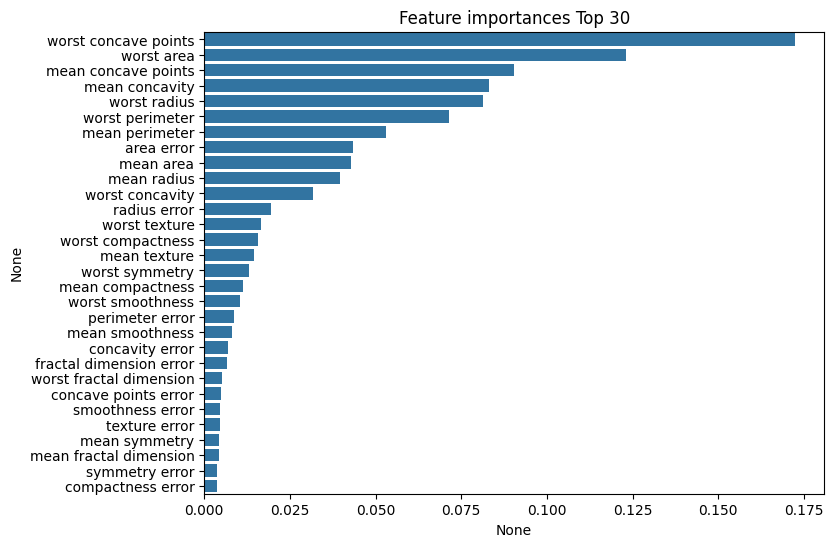

In [17]:
# feature_importances_ => 특성 중요도를 구하는 함수 사용
#   seaborn 적용 => Top 중요도로 정렬을 쉽게 하고, seaborn 막대그래프로 쉽게 표현하기 위해 Series 변환
#   ftr_top => 중요도 순으로 series 정렬
#   worst concave points로만 분류했을 때 가장 균일도가 높음을 알 수 있다.

import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(model, columns, limit=None):

  ftr_importances_values = model.feature_importances_
  ftr_importances = pd.Series(ftr_importances_values, index=columns  )
  ftr_top = ftr_importances.sort_values(ascending=False)[:limit]
  plt.figure(figsize=(8,6))
  plt.title(f'Feature importances Top {len(columns) if limit == None else limit}')
  sns.barplot(x=ftr_top , y = ftr_top.index)
  plt.show()

plot_feature_importance(rf_grid_search.best_estimator_, X_train.columns)

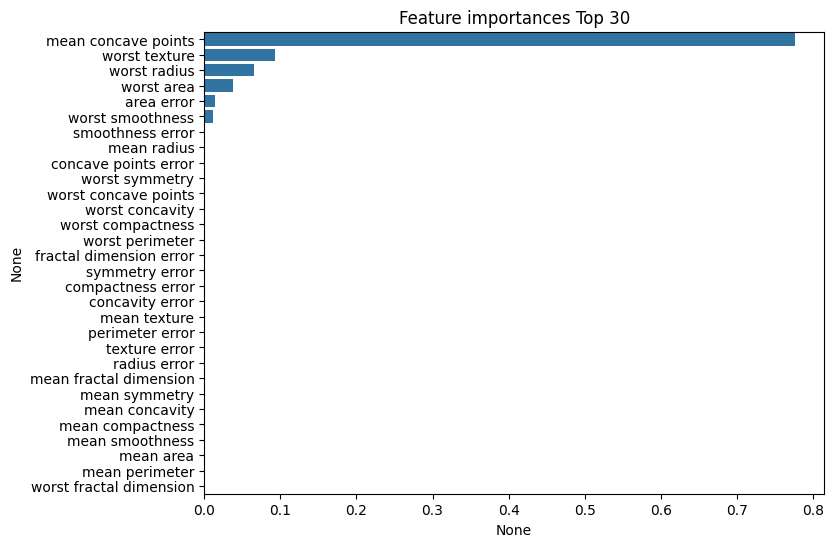

In [19]:
# GridSearchCV 수행
#   최고의 결과를 냈던 estimator 모델에서의 특성 중요도 확인 (.best_estimator_)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8, 12, 16 ,20],
    'min_samples_split' : [16, 24],
}

dt_grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=params,
    cv=5,
    scoring='accuracy'
)

dt_grid_search.fit(X_train, y_train)
plot_feature_importance(dt_grid_search.best_estimator_, X_train.columns)

In [20]:
best_dt_clf = dt_grid_search.best_estimator_
best_dt_clf

DecisionTreeClassifier(max_depth=8, min_samples_split=16, random_state=42)

## 부스팅 (Boosting)
- 여러개의 약한 학습기(weak learner)를 순차적으로 학습한다. (과소적합된 모델)
- 예측한 데이터나 학습 트리에 가중치를 부여하고, 이를 통해 **오류를 개선**하면서 학습하는 방식을 의미한다.
  - 가중치를 부여함으로써 어떤 데이터가 중요한지 나타낸다.
- 유형:
  - 에이다 부스팅 (AdaBoosting)
    - 약한 학습기들의 결과에 따라 가중치 부여하고 그 결과를 더하거나 평균을 낸다.
    - 여타 부스팅 모델의 근간이 되는 모델이나, 현재는 비교적 성능이 좋지 않아 거의 사용하지 않는다.
  - 그라디언트 부스팅 (GBM: Gradient Boost Machine)
    - 에이다를 기반으로 만들어졌으며, 훨씬 좋은 성과를 내는 모델이다.
  - XGBoost
  - LightGBM

## GradientBoosting (GBM)
- AdaBoost와 유사하나, 에러를 고치기 위해 가중치를 수정하는데 그 목적이 있다. (가중치 업데이터)
- 가중치 업데이터에 경사 하강법(G.D: Gradiant Decent)을 이용한다.
  - 경사하강법은 반복 수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법이다. (미분을 사용하여 최적의 가중치를 찾는다.)
  - 나무의 개수 = 학습횟수 = 경사하강법 수행횟수
- 점진적으로 약한 학습기를 점점 추가하며 가중치를 갱신함으로써 학습 효과를 늘려나간다.
- 주요 파라미터:
  - loss:
    - 경사하강법에서 사용할 손실 함수 지정
  - learning_rate:
    - 학습을 진행할 때마다 적용하는 학습률
    - 약한 학습기가 순차적으로 오류값을 보정해 나가는데 적용하는 계수
    - (미분값이 클 경우) 오류값이 발산되어 그래프 밖으로 나가는 것을 막기 위해 사용한다. 미분값이 너무 크면 가중치가 너무 많이 갱신되기 때문에 학습이 불안정한 상태가 된다.
    - 0에서 1 사이의 값 (방향이 반대가 되기 때문에 음수가 될 수 없다)
  - n_estimators:
    - 약한 학습기의 개수
    - weak learner가 (경사하강법을 사용하여) 순차적으로 오류를 보정하므로 예측 성능이 일정 수준 좋아지나, 수행 시간이 오래 걸리게 된다. (때문에 GBM은 실시간 ML 서비스에는 적용이 어렵다.)


### Randomforest vs Gradientboosting

### RandomForest

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  data_df.drop("target", axis=1),
  data_df['target'],
  random_state=42
)

In [22]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

train_score = forest_clf.score(X_train, y_train)
test_score  = forest_clf.score(X_test, y_test)

print("훈련 세트 점수: {:.3f}".format(train_score))
print("테스트 세트 점수: {:.3f}".format(test_score))

훈련 세트 점수 : 1.000
테스트 세트 점수 : 0.965


### GradientBoosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01).fit(X_train, y_train)

In [24]:
train_score = gb_clf.score(X_train, y_train)
test_score  = gb_clf.score(X_test, y_test)

print("훈련 세트 점수: {:.3f}".format(train_score))
print("테스트 세트 점수: {:.3f}".format(test_score))

훈련 세트 점수: 0.993
테스트 세트 점수: 0.958


## XGBoost
- 조기 중단 (Early Stopping):
  - 에러의 최저점을 찾았다면, 더 이상의 훈련을 하지 않는다. (시간 단축 가능)
  - 너무 빨리 중단되지 않도록 적절한 예측 성능 최적화 조절이 필요하다.
- 자체 내장된 교차 검증
- 결손값(NaN) 자체 처리
  - ML 들어가기 전 무조건 Nan, 중복값 처리 후 시작해야 한다.

## XGBoost - Python Native

In [25]:
!pip install xgboost==1.5.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.5/173.5 MB 2.9 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3


In [26]:
import xgboost as xgb
print(xgb.__version__)

1.5.0


/usr/local/lib/python3.10/dist-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
# 데이터 불러온 후 판다스 데이터프레임으로 시각화

from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df['target'] = cancer.target
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 데이터 분할

In [29]:
# Train - Test 분할 후 Train - Valid 분할

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_df.drop("target", axis=1),
    data_df['target'],
    random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, random_state=42
)

### DMatrix 변환
- 현재 Python Wrapper 사용 중
- DMatrix는 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost의 전용 데이터세
- Python Wrapper에서는 훈련용과 테스트용 데이터셋을 위해 별도의 DMatrix를 생성한다. (사이킷런 레퍼와의 차이점)
- 넘파이 배열, 판다스 데이터프레임에서도 변환 가능하며, Python Wrapper에서 사용하는 데이터 형식이다.


In [30]:
d_train = xgb.DMatrix(data=X_train, label=y_train)
d_valid = xgb.DMatrix(data=X_valid, label=y_valid)
d_test  = xgb.DMatrix(data=X_test, label=y_test)

### 하이퍼 파라미터 설정

In [31]:
# 정확도보다는 확률로 보는게 훨씬 좋다. 그 확률을 설정해주는게 objective, eval_metric.
# 1:99나 49:51 모두 오른쪽 클래스가 답으로 나오지만 성능면으로 봤을 때는 1:99 확률이 좋기 때문에 확률을 보는 것

#   eta == learning_rate(사이킷런 레퍼) => 학습률
#   objective => 목적 함수(모델이 예측의 결과를 어떻게 표현할지를 지정하는 함수).
#                logistic 함수를 사용하기 때문에 확률로 결과물을 내어준다.
#   eval_metric => 반복 수행 시 사용하는 비용 평가 지표로, error(성능) 측정 함수
#   num_rounds => 학습 횟수

params = {
    'max_depth': 3,
    'eta': 0.05,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

num_rounds = 400

### 학습 및 검증에 사용될 데이터 세트 지정하기
- train: 학습
- eval: 검증

In [32]:
# 파이썬 레퍼와 사이킷런 레퍼 모두 동일하게 수행되는 부분이다.

eval_list = [
    (d_train, 'train'),
    (d_valid, 'eval')
]

### 훈련

In [33]:
# 최적의 상태는 검증과 훈련 세트의 loss가 같이 낮아지는 것이다.
#   (loss가 낮아진다 == error가 사라진다)
# 아래 예제의 경우 조기 중단 횟수 50회 동안 에러를 해결하지 못했으며, 과대적합된 것으로 보인다.

xgb_model = xgb.train(
    params=params,            # 하이퍼 파라미터가 들어있는 딕셔너리
    dtrain = d_train,         # 훈련 데이터 Feature + Label
    num_boost_round=10000,    # 훈련 횟수
    early_stopping_rounds=50, # 성능 개선(Loss가 낮아지면 성능이 개선됨)이 50라운드 이내에 이루어지지 않으면 학습을 종료
    evals = eval_list         # 검증 세트 지정. 여기에서는 훈련 세트와 검증세트에 대한 성능을 한꺼번에 확인
)

[0]	train-logloss:0.65124	eval-logloss:0.65404
[1]	train-logloss:0.61200	eval-logloss:0.62023
[2]	train-logloss:0.57754	eval-logloss:0.58633
[3]	train-logloss:0.54460	eval-logloss:0.55826
[4]	train-logloss:0.51435	eval-logloss:0.53266
[5]	train-logloss:0.48771	eval-logloss:0.50902
[6]	train-logloss:0.46188	eval-logloss:0.48738
[7]	train-logloss:0.43893	eval-logloss:0.46707
[8]	train-logloss:0.41664	eval-logloss:0.44913
[9]	train-logloss:0.39683	eval-logloss:0.43179
[10]	train-logloss:0.37746	eval-logloss:0.41644
[11]	train-logloss:0.36018	eval-logloss:0.40182
[12]	train-logloss:0.34321	eval-logloss:0.38998
[13]	train-logloss:0.32734	eval-logloss:0.37724
[14]	train-logloss:0.31250	eval-logloss:0.36721
[15]	train-logloss:0.29930	eval-logloss:0.35642
[16]	train-logloss:0.28621	eval-logloss:0.34786
[17]	train-logloss:0.27395	eval-logloss:0.34002
[18]	train-logloss:0.26244	eval-logloss:0.33208
[19]	train-logloss:0.25146	eval-logloss:0.32362
[20]	train-logloss:0.24147	eval-logloss:0.31627
[2

### 예측

In [35]:
# 모델 만들 때 objective 함수를 logistic으로 지정했기 때문에 확률 형식으로 예측된다.
#   양성(1)으로 분류될 확률

import numpy as np

pred_props = xgb_model.predict(d_test)
print(np.round(pred_props[:10], 3))

[0.935 0.001 0.    0.999 1.    0.001 0.002 0.642 0.521 0.997]


In [36]:
# 0.5보다 크면 1, 작으면 0으로 변환

preds = [ 1 if x > 0.5 else 0 for x in pred_props ]
preds[ :10 ]

[1, 0, 0, 1, 1, 0, 0, 1, 1, 1]

## XGBoost - Scikit Learn Wrapper⭐

In [39]:
# learning_rate == eta (파이썬 레퍼) => 학습률
#   n_estimators => 학습할 학습기의 개수(훈련 횟수)
#   eval_metric => 반복 수행 시 사용하는 비용 평가 지표로, error(성능) 측정 함수

from xgboost import XGBClassifier

# 조기 종료 X
xgb_clf = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=3,
    eval_metric='logloss'
)

### 훈련

In [40]:
# verbose => 로그 출력 여부

xgb_clf.fit(X_train, y_train, verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### 예측

In [41]:
# 결정된 클래스가 출력된다

preds = xgb_clf.predict(X_test)
preds[:10]

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [43]:
# pred_proba => 예측된 각각의 클래스 확률 정보 확인
#   분류모델 평가방법에서 정밀도-재현율 트레이드 오프로 사용(pred_proba)
#   분류모델에서는 array([pred1, pred2]) => pred1은 음성(0)이 될 확률, 양성(1)이 될 확률을 의미했었다.

pred_proba = xgb_clf.predict_proba(X_test)
pred_proba[:10]

array([[7.0421875e-02, 9.2957813e-01],
       [9.9837631e-01, 1.6236610e-03],
       [9.9944514e-01, 5.5486610e-04],
       [1.5223622e-03, 9.9847764e-01],
       [2.8401613e-04, 9.9971598e-01],
       [9.9914682e-01, 8.5319200e-04],
       [9.9682111e-01, 3.1789127e-03],
       [4.3057954e-01, 5.6942046e-01],
       [5.5072081e-01, 4.4927916e-01],
       [3.7894249e-03, 9.9621058e-01]], dtype=float32)

### Early Stopping
- 조기중단 설정 파라미터
  - early_stopping_rounds: 더 이상 손실 평가 지표가 감소하지 않는 최대 반복 횟수
  - eval_metric: 반복 수행 시 사용하는 비용 평가 지표
  - eval_set: 평가를 수행하는 별도의 검증 데이터 세트 설정. 일반적으로 검증 데이터 세트에서 반복적으로 손실 감소 성능 평가.

In [44]:
xgb_clf = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=3,
    eval_metric='logloss'
)

In [45]:
# eval_sets => 검증 데이터 목록
# verbose => 로그 출력 여부
#   훈련 세트 & 검증 세트로 각각 따로 검증 => 과대적합인지 확인하기 위한 목적
#   훈련 세트로 검증: 학습한 내용에 대한 검증을 수행 (알고 있는 데이터 검증 )
#   검증 세트로 검증: 모르는 내용에 대한 검증을 수행

eval_sets = [
    (X_train, y_train),
    (X_valid, y_valid)
]

xgb_clf.fit(
    X_train, y_train,
    early_stopping_rounds=50,
    eval_set = eval_sets,
    verbose=True
)

[0]	validation_0-logloss:0.65124	validation_1-logloss:0.65404
[1]	validation_0-logloss:0.61200	validation_1-logloss:0.62023
[2]	validation_0-logloss:0.57754	validation_1-logloss:0.58633
[3]	validation_0-logloss:0.54460	validation_1-logloss:0.55826
[4]	validation_0-logloss:0.51435	validation_1-logloss:0.53266
[5]	validation_0-logloss:0.48771	validation_1-logloss:0.50902
[6]	validation_0-logloss:0.46188	validation_1-logloss:0.48738
[7]	validation_0-logloss:0.43893	validation_1-logloss:0.46707
[8]	validation_0-logloss:0.41664	validation_1-logloss:0.44913
[9]	validation_0-logloss:0.39683	validation_1-logloss:0.43179
[10]	validation_0-logloss:0.37746	validation_1-logloss:0.41644
[11]	validation_0-logloss:0.36018	validation_1-logloss:0.40182
[12]	validation_0-logloss:0.34321	validation_1-logloss:0.38998
[13]	validation_0-logloss:0.32734	validation_1-logloss:0.37724
[14]	validation_0-logloss:0.31250	validation_1-logloss:0.36721
[15]	validation_0-logloss:0.29930	validation_1-logloss:0.35642
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## LightGBM
- LGBM이 가장 마지막에 출시된 최종판이나, 항상 최고의 결과를 출력하진 않는다.
  - 출시 순서: GBM -> XGBM -> LGBM
- XGBM보다 학습과 예측 수행 시간이 빠르다.
- 원-핫 인코딩을 사용하지 않고도 카테고리형 feature를 최적으로 변환하고, 이에 따른 분할 노드를 수행한다.
- 일반적인 GBM 방식인 균형 트리 분할 방법(Level Wise)과 달리, 리프 중심 트리 분할 방법(Leaf Wise)을 사용한다.
  - 균형 트리 분할: depth를 최소화하기 위해 균형 잡힌 트리 생성
  - 리프 중심 트리 분할: 균형에 초점X. 예측만 잘 된다면 한쪽 방향으로 내려가도 상관없으며, 예측 성능의 빠른 개선이 목적이다.

In [46]:
!pip install lightgbm==3.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [47]:
import lightgbm

print(lightgbm.__version__)

3.3.2


In [49]:
# 데이터 로드 / 데이터프레임 시각화 / 훈련-테스트, 훈련-검증 데이터 분할
import warnings
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

warnings.filterwarnings('ignore')

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df['target'] = cancer.target

X_train , X_test , y_train , y_test = train_test_split(
    data_df.drop("target", axis=1),
    data_df['target'],
    random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train,
    y_train,
    random_state=42
)

### LightGBM - Scikit Learn Wrapper

In [50]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.05
)

In [51]:
eval_sets = [
    (X_train, y_train),
    (X_valid, y_valid)
]

lgbm_clf.fit(
    X_train, y_train,
    early_stopping_rounds=50,
    eval_metric='logloss',
    eval_set=eval_sets,
    verbose=True
)

[1]	training's binary_logloss: 0.629304	valid_1's binary_logloss: 0.597757
[2]	training's binary_logloss: 0.594494	valid_1's binary_logloss: 0.566806
[3]	training's binary_logloss: 0.563069	valid_1's binary_logloss: 0.539975
[4]	training's binary_logloss: 0.534431	valid_1's binary_logloss: 0.514238
[5]	training's binary_logloss: 0.508118	valid_1's binary_logloss: 0.491893
[6]	training's binary_logloss: 0.482131	valid_1's binary_logloss: 0.471166
[7]	training's binary_logloss: 0.458798	valid_1's binary_logloss: 0.449081
[8]	training's binary_logloss: 0.438126	valid_1's binary_logloss: 0.430998
[9]	training's binary_logloss: 0.417853	valid_1's binary_logloss: 0.411616
[10]	training's binary_logloss: 0.398524	valid_1's binary_logloss: 0.396487
[11]	training's binary_logloss: 0.380582	valid_1's binary_logloss: 0.380199
[12]	training's binary_logloss: 0.363636	valid_1's binary_logloss: 0.36537
[13]	training's binary_logloss: 0.348995	valid_1's binary_logloss: 0.352506
[14]	training's binary

LGBMClassifier(learning_rate=0.05, n_estimators=400)